1. What are the top five hotel features (e.g., location, staff, etc.) that customers mention the most in positive reviews and top five features they mention most in negative reviews? Your identified features must make sense (e.g., "great" or "negative" are not features).

In [48]:
### this works for first question
import pandas as pd
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
import nltk
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Load the data into a pandas DataFrame
data = pd.read_excel("BookingDotCom_HotelReviews.xlsx", nrows=20000)

#The following code will provide a random sampling instead of taking the top 20000. I used the above mentioned method so that it takes less time

'''
# Load the data into a pandas DataFrame
data_full = pd.read_excel("BookingDotCom_HotelReviews.xlsx")

# Perform random sampling
data = data_full.sample(n=20000, random_state=100)
'''

# Initialize stopwords
stop_words = set(stopwords.words('english'))

# Function to lemmatize tokens and keep only nouns
def extract_nouns(text):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tagged_tokens = pos_tag(word_tokenize(text))
    return [lemmatizer.lemmatize(word.lower(), pos='n') for word, tag in tagged_tokens if tag.startswith('N') and word.isalpha() and word.lower() not in stop_words]

# Tokenize positive and negative reviews and apply lemmatization
positive_reviews = ' '.join(data[data['Positive_Comments'] != 'No Positive']['Positive_Comments'])
negative_reviews = ' '.join(data[data['Negative_Comments'] != 'No Negative']['Negative_Comments'])

positive_nouns = extract_nouns(positive_reviews)
negative_nouns = extract_nouns(negative_reviews)

# Count the occurrences of each noun in positive and negative reviews
positive_counts = Counter(positive_nouns)
negative_counts = Counter(negative_nouns)

# Get the top five features mentioned in positive and negative reviews
top_positive_features = positive_counts.most_common(5)
top_negative_features = negative_counts.most_common(5)

print("Top five features mentioned in positive reviews:")
for feature, count in top_positive_features:
    print(f"{feature}: {count}")

print("\nTop five features mentioned in negative reviews:")
for feature, count in top_negative_features:
    print(f"{feature}: {count}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Top five features mentioned in positive reviews:
staff: 7782
room: 7396
location: 6715
hotel: 4900
breakfast: 2638

Top five features mentioned in negative reviews:
room: 9321
hotel: 3013
breakfast: 2177
staff: 1595
bed: 1344


2. What are the top five features that customers prefer most if they are a solo traveler vs traveling with a group vs on a business trip vs a leisure trip vs traveling as a couple vs a family with young children. You will find these categories in the "Tags" column. There are a few more tags that we don't need.


In [ ]:
# Initialize a set to store unique categories
unique_categories = set()

# Iterate through each entry in the "Tags" column
for entry in data['Tags']:
    # Split the entry by commas and strip whitespace from each category
    categories = [category.strip("[]' ") for category in entry.split(',')]
    # Add each category to the set of unique categories
    unique_categories.update(categories)

# Print unique categories
print("Unique categories in the 'Tags' column:")
for category in unique_categories:
    print(category)
#I took out the unique values to check if I have missed something or is there any important feature that I have left out.

In [50]:
# Define traveler categories of interest
traveler_categories = ["Solo traveler", "Group", "Business trip", "Leisure trip", "Couple", "Family with young children"]

# Initialize dictionary to store top features for each traveler category
top_features_by_category = {category: Counter() for category in traveler_categories}

# Tokenize positive reviews and filter based on traveler category
stop_words = set(stopwords.words('english'))

for index, row in data.iterrows():
    tags = row['Tags']
    positive_review = row['Positive_Comments']

    for category in traveler_categories:
        if category in tags:
            # Tokenize positive review
            positive_tokens = word_tokenize(positive_review.lower())
            # Filter only nouns using NLTK's part-of-speech tagging
            tagged_tokens = nltk.pos_tag(positive_tokens)
            positive_nouns = [word for word, tag in tagged_tokens if tag.startswith('N')]
            # Remove stopwords
            positive_nouns = [word for word in positive_nouns if word.isalpha() and word not in stop_words]
            # Update Counter with positive nouns
            top_features_by_category[category].update(positive_nouns)

# Print top five features (nouns) for each traveler category
for category, top_features_counter in top_features_by_category.items():
    print(f"Top five features for {category}:")
    for feature, count in top_features_counter.most_common(5):
        print(f"{feature}: {count}")
    print()

Top five features for Solo traveler:
staff: 1394
location: 1321
room: 1178
hotel: 807
breakfast: 442

Top five features for Group:
staff: 956
location: 796
hotel: 619
room: 608
breakfast: 305

Top five features for Business trip:
staff: 977
location: 956
room: 811
hotel: 556
breakfast: 364

Top five features for Leisure trip:
staff: 6528
location: 5592
room: 4928
hotel: 4032
breakfast: 2206

Top five features for Couple:
staff: 3890
location: 3224
room: 3059
hotel: 2440
breakfast: 1324

Top five features for Family with young children:
staff: 1037
location: 931
room: 760
hotel: 600
breakfast: 406



3. What are the top five features customers like most and top five features they complain about most about hotels in United Kingdom, France, Italy, and Spain? Country information is available inside Hotel_Address.

In [51]:
# Define the countries of interest
countries_of_interest = ["United Kingdom", "France", "Italy", "Spain"]

# Initialize dictionaries to store top features for each country
top_positive_features_by_country = {country: Counter() for country in countries_of_interest}
top_negative_features_by_country = {country: Counter() for country in countries_of_interest}

# Initialize WordNet Lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to extract nouns from text and lemmatize them
def extract_nouns_and_lemmatize(text):
    tokens = word_tokenize(text.lower())
    tagged_tokens = nltk.pos_tag(tokens)
    lemmatized_nouns = [lemmatizer.lemmatize(word) for word, tag in tagged_tokens if tag.startswith('N') and word.isalpha() and word not in stop_words and word != 'nothing']
    return lemmatized_nouns

# Tokenize reviews and process them
for index, row in data.iterrows():
    hotel_address = row['Hotel_Address']
    positive_comment = row['Positive_Comments']
    negative_comment = row['Negative_Comments']

    # Extract country from hotel address
    country = None
    for c in countries_of_interest:
        if c in hotel_address:
            country = c
            break

    if country is not None:
        # Extract nouns and lemmatize positive comment
        positive_nouns = extract_nouns_and_lemmatize(positive_comment)
        top_positive_features_by_country[country].update(positive_nouns)

        # Extract nouns and lemmatize negative comment
        negative_nouns = extract_nouns_and_lemmatize(negative_comment)
        top_negative_features_by_country[country].update(negative_nouns)

# Print top five features liked and complained about the most for each country
for country in countries_of_interest:
    print(f"\nTop five features liked the most in {country}:")
    for feature, count in top_positive_features_by_country[country].most_common(5):
        print(f"{feature}: {count}")

    print(f"\nTop five features complained about the most in {country}:")
    for feature, count in top_negative_features_by_country[country].most_common(5):
        print(f"{feature}: {count}")

# Output is not showing all countries because of the sample size. If we increase the sample size or take a random sample then more countries will show up.


Top five features liked the most in United Kingdom:
staff: 6706
room: 6283
location: 5680
hotel: 4040
breakfast: 2359

Top five features complained about the most in United Kingdom:
room: 8221
hotel: 2541
breakfast: 1904
staff: 1401
bed: 1202

Top five features liked the most in France:
location: 955
staff: 919
room: 916
hotel: 665
breakfast: 287

Top five features complained about the most in France:
room: 828
hotel: 348
breakfast: 236
staff: 157
bathroom: 134

Top five features liked the most in Italy:

Top five features complained about the most in Italy:

Top five features liked the most in Spain:

Top five features complained about the most in Spain:


4. Create a dashboard with the following plots; (1) "Top Five Hotels Overall" with consistently high ratings, (2) Bottom Five Hotels Overall" with consistently low ratings, (3) Five Most Improved Hotels" with the highest improvement in average ratings from 2015 to 2017, showing their average ratings for each of the three years.

<ipython-input-52-3eeae0b6315a>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_five_hotels.values, y=top_five_hotels.index, palette='viridis')
<ipython-input-52-3eeae0b6315a>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_five_hotels.values, y=bottom_five_hotels.index, palette='inferno')
<ipython-input-52-3eeae0b6315a>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_improved_hotels.values, y=most_improved_hotels.index, palette='coolwarm')


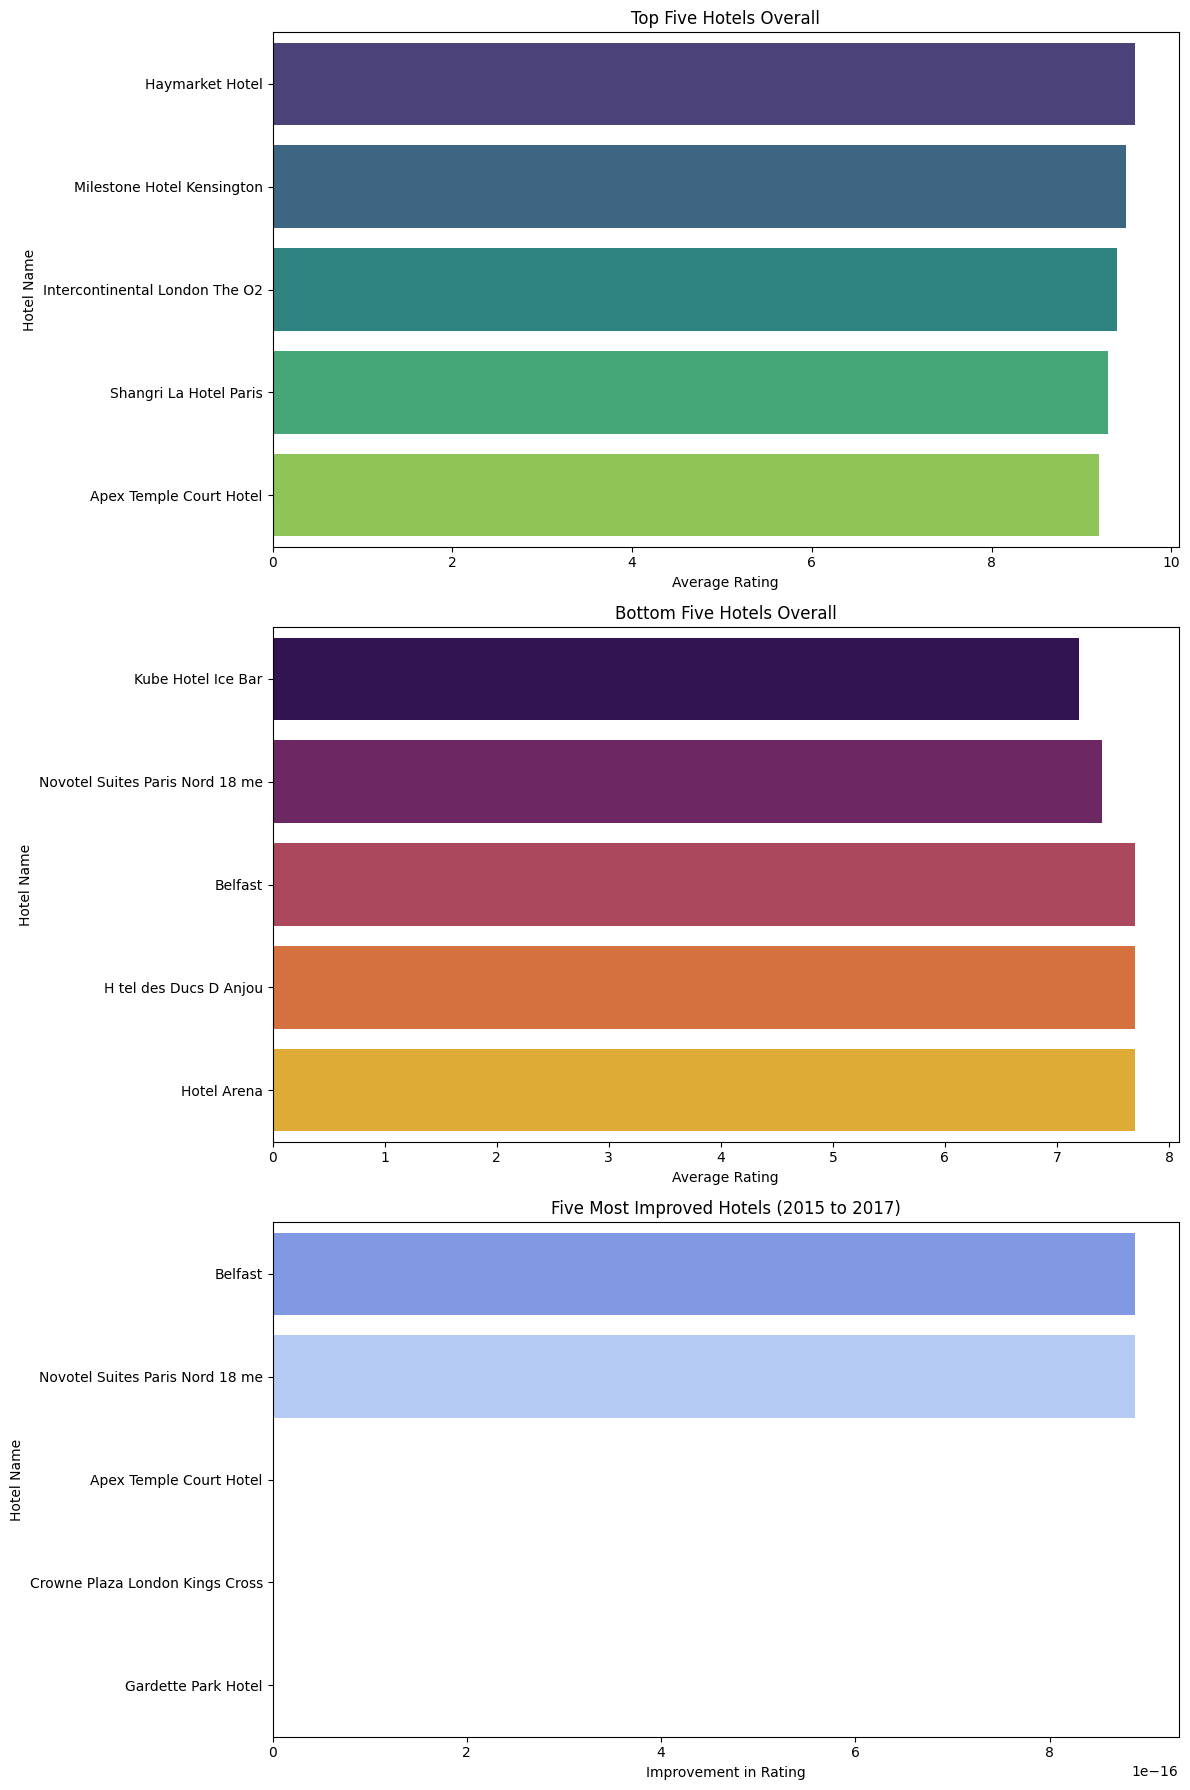

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average ratings for each hotel across all years
average_ratings = data.groupby('Hotel_Name')['Average_Hotel_Score'].mean()

# Top Five Hotels Overall
top_five_hotels = average_ratings.nlargest(5)

# Bottom Five Hotels Overall
bottom_five_hotels = average_ratings.nsmallest(5)

# Convert 'Review_Date' column to string type
data['Review_Date'] = data['Review_Date'].astype(str)

# Calculate improvement in ratings from 2015 to 2017
ratings_2015 = data[data['Review_Date'].str.contains('2015')].groupby('Hotel_Name')['Average_Hotel_Score'].mean()
ratings_2017 = data[data['Review_Date'].str.contains('2017')].groupby('Hotel_Name')['Average_Hotel_Score'].mean()
improvement = ratings_2017 - ratings_2015
most_improved_hotels = improvement.nlargest(5)

# Plotting
plt.figure(figsize=(12, 18))

# Top Five Hotels Overall
plt.subplot(3, 1, 1)
sns.barplot(x=top_five_hotels.values, y=top_five_hotels.index, palette='viridis')
plt.title('Top Five Hotels Overall')
plt.xlabel('Average Rating')
plt.ylabel('Hotel Name')

# Bottom Five Hotels Overall
plt.subplot(3, 1, 2)
sns.barplot(x=bottom_five_hotels.values, y=bottom_five_hotels.index, palette='inferno')
plt.title('Bottom Five Hotels Overall')
plt.xlabel('Average Rating')
plt.ylabel('Hotel Name')

# Five Most Improved Hotels
plt.subplot(3, 1, 3)
sns.barplot(x=most_improved_hotels.values, y=most_improved_hotels.index, palette='coolwarm')
plt.title('Five Most Improved Hotels (2015 to 2017)')
plt.xlabel('Improvement in Rating')
plt.ylabel('Hotel Name')

plt.tight_layout()
plt.show()